In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [3]:
data=pd.read_csv(r'price-prediction-laptop/laptop_data.csv')

In [4]:
data.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [5]:
data.drop(columns=['Unnamed: 0'],inplace=True)

In [6]:
data.columns

Index(['Company', 'TypeName', 'Inches', 'ScreenResolution', 'Cpu', 'Ram',
       'Memory', 'Gpu', 'OpSys', 'Weight', 'Price'],
      dtype='object')

In [7]:
data.shape

(1303, 11)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   object 
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   object 
 10  Price             1303 non-null   float64
dtypes: float64(2), object(9)
memory usage: 112.1+ KB


In [9]:
data.describe()

,Inches,Price
count,1303.000000,1303.000000
mean,15.017191,59870.042910
std,1.426304,37243.201786
min,10.100000,9270.720000
25%,14.000000,31914.720000
50%,15.600000,52054.560000
75%,15.600000,79274.246400
max,18.400000,324954.720000


In [10]:
data.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [11]:
data[['x_res','y_res']]=data['ScreenResolution'].apply(lambda x: re.findall(r'\d*x\d*',x)[0]).str.split('x',expand=True)

In [12]:
data.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,x_res,y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000,1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360,2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080,2560,1600


In [13]:
data['full_hd']=data['ScreenResolution'].apply(lambda x:1 if 'Full HD' in x else 0)

In [14]:
data['ips_panel']=data['ScreenResolution'].apply(lambda x:1 if 'IPS Panel' in x else 0)

In [15]:
data['touchscreen']=data['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)

In [16]:
data['4k_display']=data['ScreenResolution'].apply(lambda x:1 if '4K Ultra HD' in x else 0)

In [17]:
data.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,x_res,y_res,full_hd,ips_panel,touchscreen,4k_display
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,2560,1600,0,1,0,0
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,1440,900,0,0,0,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000,1920,1080,1,0,0,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360,2880,1800,0,1,0,0
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080,2560,1600,0,1,0,0


In [18]:
data.drop(columns=['ScreenResolution'],inplace=True)

In [19]:
data.head()

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,x_res,y_res,full_hd,ips_panel,touchscreen,4k_display
0,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,2560,1600,0,1,0,0
1,Apple,Ultrabook,13.3,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,1440,900,0,0,0,0
2,HP,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000,1920,1080,1,0,0,0
3,Apple,Ultrabook,15.4,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360,2880,1800,0,1,0,0
4,Apple,Ultrabook,13.3,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080,2560,1600,0,1,0,0


In [20]:
data['cpu_type']=data['Cpu'].str.extract(r"(Core i\d|Celeron|Pentium|Ryzen|A\d*-Series)")

In [21]:
data['cpu_type'].isnull().sum()

np.int64(48)

In [22]:
data['cpu_type'].fillna('Others',inplace=True)

C:\Users\Rano's PC\AppData\Local\Temp\ipykernel_12292\3181611397.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['cpu_type'].fillna('Others',inplace=True)


In [23]:
data.cpu_type.value_counts()

cpu_type
Core i7       527
Core i5       423
Core i3       136
Celeron        88
Others         48
Pentium        30
A9-Series      17
A6-Series      11
A12-Series      8
A10-Series      6
Ryzen           4
A8-Series       4
A4-Series       1
Name: count, dtype: int64

<Axes: xlabel='cpu_type', ylabel='Price'>

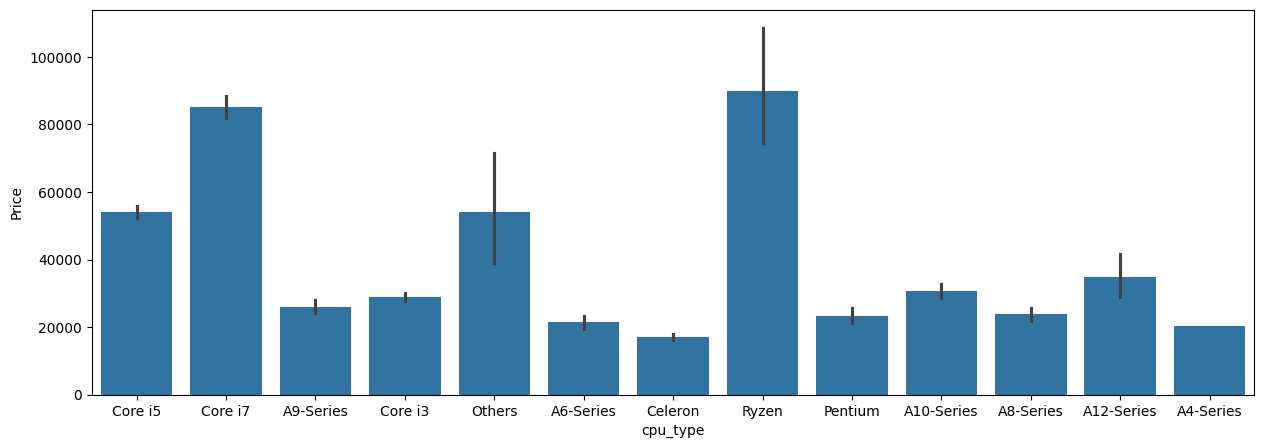

In [24]:
plt.figure(figsize=(15,5))
sns.barplot(x='cpu_type',y='Price',data=data)

In [25]:
data['cpu_type']=data['cpu_type'].apply(lambda x: 'A Series' if 'Series' in x else x)

In [26]:
data['cpu_type'].value_counts()

cpu_type
Core i7     527
Core i5     423
Core i3     136
Celeron      88
Others       48
A Series     47
Pentium      30
Ryzen         4
Name: count, dtype: int64

<Axes: xlabel='cpu_type', ylabel='Price'>

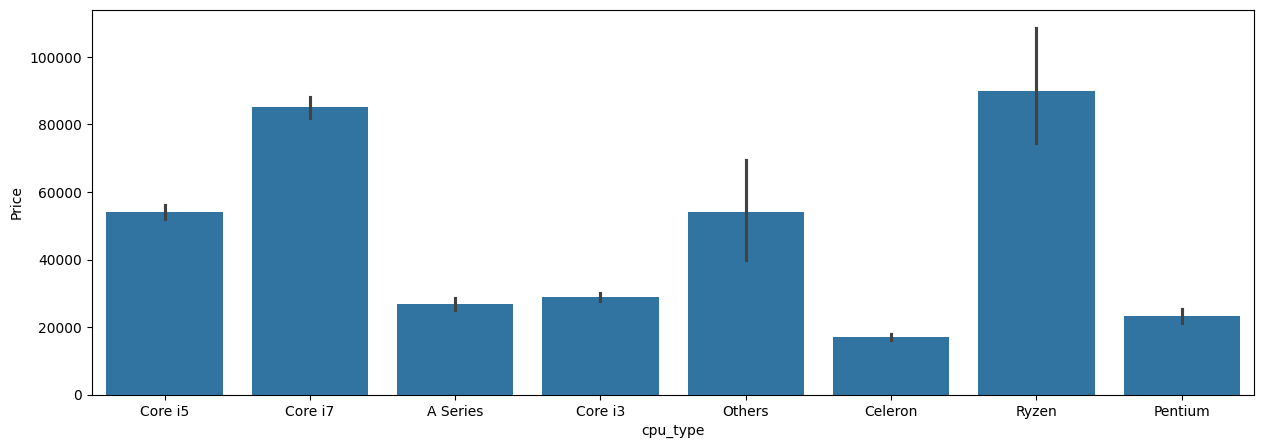

In [27]:
plt.figure(figsize=(15,5))
sns.barplot(x='cpu_type',y='Price',data=data)

In [28]:
data.head()

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,x_res,y_res,full_hd,ips_panel,touchscreen,4k_display,cpu_type
0,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,2560,1600,0,1,0,0,Core i5
1,Apple,Ultrabook,13.3,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,1440,900,0,0,0,0,Core i5
2,HP,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000,1920,1080,1,0,0,0,Core i5
3,Apple,Ultrabook,15.4,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360,2880,1800,0,1,0,0,Core i7
4,Apple,Ultrabook,13.3,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080,2560,1600,0,1,0,0,Core i5


In [29]:
data['cpu_speed']=data['Cpu'].str.extract(r"(\d+(\.\d+)?GHz)")[0]

In [30]:
data['cpu_speed']=data['cpu_speed'].str.replace('GHz',"").astype(float)

In [31]:
data['cpu_brand']=data['Cpu'].str.extract(r"(Intel|AMD)")

In [32]:
data.head()

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,x_res,y_res,full_hd,ips_panel,touchscreen,4k_display,cpu_type,cpu_speed,cpu_brand
0,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,2560,1600,0,1,0,0,Core i5,2.3,Intel
1,Apple,Ultrabook,13.3,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,1440,900,0,0,0,0,Core i5,1.8,Intel
2,HP,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000,1920,1080,1,0,0,0,Core i5,2.5,Intel
3,Apple,Ultrabook,15.4,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360,2880,1800,0,1,0,0,Core i7,2.7,Intel
4,Apple,Ultrabook,13.3,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080,2560,1600,0,1,0,0,Core i5,3.1,Intel


In [33]:
data[data['cpu_brand'].isnull()]

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,x_res,y_res,full_hd,ips_panel,touchscreen,4k_display,cpu_type,cpu_speed,cpu_brand
1191,Samsung,2 in 1 Convertible,12.3,Samsung Cortex A72&A53 2.0GHz,4GB,32GB Flash Storage,ARM Mali T860 MP4,Chrome OS,1.15kg,35111.52,2400,1600,0,1,1,0,Others,2.0,NaN


In [34]:
data['cpu_brand'].value_counts()

cpu_brand
Intel    1240
AMD        62
Name: count, dtype: int64

<Axes: xlabel='cpu_brand', ylabel='Price'>

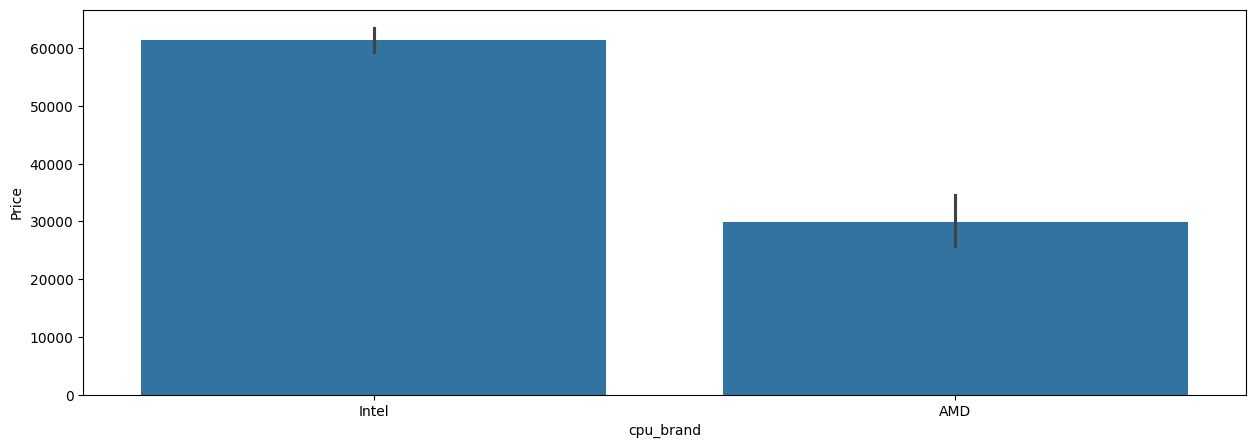

In [35]:
plt.figure(figsize=(15,5))
sns.barplot(x='cpu_brand',y='Price',data=data)

In [36]:
data['cpu_brand'].fillna('Intel',inplace=True)

C:\Users\Rano's PC\AppData\Local\Temp\ipykernel_12292\2429855101.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['cpu_brand'].fillna('Intel',inplace=True)


In [37]:
data.head()

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,x_res,y_res,full_hd,ips_panel,touchscreen,4k_display,cpu_type,cpu_speed,cpu_brand
0,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,2560,1600,0,1,0,0,Core i5,2.3,Intel
1,Apple,Ultrabook,13.3,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,1440,900,0,0,0,0,Core i5,1.8,Intel
2,HP,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000,1920,1080,1,0,0,0,Core i5,2.5,Intel
3,Apple,Ultrabook,15.4,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360,2880,1800,0,1,0,0,Core i7,2.7,Intel
4,Apple,Ultrabook,13.3,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080,2560,1600,0,1,0,0,Core i5,3.1,Intel


In [38]:
data.drop('Cpu',axis=1,inplace=True)

In [39]:
data.sample(2)

,Company,TypeName,Inches,Ram,Memory,Gpu,OpSys,Weight,Price,x_res,y_res,full_hd,ips_panel,touchscreen,4k_display,cpu_type,cpu_speed,cpu_brand
536,Dell,Notebook,15.6,8GB,256GB SSD,AMD Radeon 530,Windows 10,2.2kg,42486.0048,1920,1080,1,0,0,0,Core i5,1.6,Intel
638,Lenovo,2 in 1 Convertible,13.3,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,1.37kg,93635.3376,1920,1080,1,1,1,0,Core i7,2.7,Intel


In [40]:
data['primary_memory']=data['Memory'].str.split("+",expand=True)[0]

In [41]:
data['secondary_memory']=data['Memory'].str.split("+",expand=True)[1]

In [42]:
def fetch_memory_type(data):
    if 'HDD' in data:
        return 'HDD'
    elif 'Flash Storage' in data:
        return 'Flash Storage'
    elif 'Hybrid' in data:
        return 'Hybrid'
    else:
        return 'SSD'

In [43]:
data['primary_memory_type']=data['primary_memory'].apply(fetch_memory_type)

In [44]:
data['primary_memory_capacity']=data['primary_memory'].str.extract(r"(\d+(\.\d+)?)")[0]

In [45]:
data[data['primary_memory_capacity'].isnull()]

,Company,TypeName,Inches,Ram,Memory,Gpu,OpSys,Weight,Price,x_res,...,ips_panel,touchscreen,4k_display,cpu_type,cpu_speed,cpu_brand,primary_memory,secondary_memory,primary_memory_type,primary_memory_capacity


In [46]:
data['primary_memory_capacity']=data['primary_memory_capacity'].apply(lambda x: 1024 if x==1 else(2048 if x==2 else x))

In [47]:
data['secondary_memory']=data['secondary_memory'].fillna('others')

In [48]:
def fetch_secondary_memory_type(data):
    if 'HDD' in data:
        return 'HDD'
    elif 'Flash Storage' in data:
        return 'Flash Storage'
    elif 'Hybrid' in data:
        return 'Hybrid'
    elif 'SSD' in data:
        return 'SSD'
    else:
        return 'No Secondary Memory'

In [49]:
data['secondary_memory_type']=data['secondary_memory'].apply(fetch_secondary_memory_type)

In [50]:
data['secondary_memory_capacity']=data['secondary_memory'].str.extract(r"(\d+(\.\d+)?)")[0]

In [51]:
data['secondary_memory_capacity'].fillna(0,inplace=True)

C:\Users\Rano's PC\AppData\Local\Temp\ipykernel_12292\2149360964.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['secondary_memory_capacity'].fillna(0,inplace=True)


In [52]:
data['primary_memory_capacity']=data['primary_memory_capacity'].astype(float)

In [53]:
data['primary_memory_capacity']=data['primary_memory_capacity'].apply(lambda x: 1024 if x==1 else(2048 if x==2 else x))

In [54]:
data['primary_memory_capacity']=data['primary_memory_capacity'].astype(int)

In [55]:
data['secondary_memory_capacity']=data['secondary_memory_capacity'].astype(float)

In [56]:
data['secondary_memory_capacity']=data['secondary_memory_capacity'].astype(int)

In [57]:
data['secondary_memory_capacity']=data['secondary_memory_capacity'].apply(lambda x: 1024 if x==1 else(2048 if x==2 else x))

In [58]:
data.drop('Memory',axis=1,inplace=True)

In [59]:
data.head()

,Company,TypeName,Inches,Ram,Gpu,OpSys,Weight,Price,x_res,y_res,...,4k_display,cpu_type,cpu_speed,cpu_brand,primary_memory,secondary_memory,primary_memory_type,primary_memory_capacity,secondary_memory_type,secondary_memory_capacity
0,Apple,Ultrabook,13.3,8GB,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,2560,1600,...,0,Core i5,2.3,Intel,128GB SSD,others,SSD,128,No Secondary Memory,0
1,Apple,Ultrabook,13.3,8GB,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,1440,900,...,0,Core i5,1.8,Intel,128GB Flash Storage,others,Flash Storage,128,No Secondary Memory,0
2,HP,Notebook,15.6,8GB,Intel HD Graphics 620,No OS,1.86kg,30636.0000,1920,1080,...,0,Core i5,2.5,Intel,256GB SSD,others,SSD,256,No Secondary Memory,0
3,Apple,Ultrabook,15.4,16GB,AMD Radeon Pro 455,macOS,1.83kg,135195.3360,2880,1800,...,0,Core i7,2.7,Intel,512GB SSD,others,SSD,512,No Secondary Memory,0
4,Apple,Ultrabook,13.3,8GB,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080,2560,1600,...,0,Core i5,3.1,Intel,256GB SSD,others,SSD,256,No Secondary Memory,0


In [60]:
data.drop(columns=['primary_memory','secondary_memory'],inplace=True)

In [61]:
data.head()

,Company,TypeName,Inches,Ram,Gpu,OpSys,Weight,Price,x_res,y_res,...,ips_panel,touchscreen,4k_display,cpu_type,cpu_speed,cpu_brand,primary_memory_type,primary_memory_capacity,secondary_memory_type,secondary_memory_capacity
0,Apple,Ultrabook,13.3,8GB,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,2560,1600,...,1,0,0,Core i5,2.3,Intel,SSD,128,No Secondary Memory,0
1,Apple,Ultrabook,13.3,8GB,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,1440,900,...,0,0,0,Core i5,1.8,Intel,Flash Storage,128,No Secondary Memory,0
2,HP,Notebook,15.6,8GB,Intel HD Graphics 620,No OS,1.86kg,30636.0000,1920,1080,...,0,0,0,Core i5,2.5,Intel,SSD,256,No Secondary Memory,0
3,Apple,Ultrabook,15.4,16GB,AMD Radeon Pro 455,macOS,1.83kg,135195.3360,2880,1800,...,1,0,0,Core i7,2.7,Intel,SSD,512,No Secondary Memory,0
4,Apple,Ultrabook,13.3,8GB,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080,2560,1600,...,1,0,0,Core i5,3.1,Intel,SSD,256,No Secondary Memory,0


In [62]:
data['Ram']=data['Ram'].str.replace('GB',"").astype(int)

In [63]:
data['gpu_brand']=data['Gpu'].str.extract(r'(Intel HD|Intel UHD|Nvidia GeForce|AMD Radeon|Intel|Nvidia|AMD|ARM)')

In [64]:
data.drop('Gpu',axis=1,inplace=True)

In [65]:
data['os']=data['OpSys'].str.extract(r'(Windows|mac|Mac|Linux|No OS|Chrome OS)')

In [66]:
data['os'].isnull().sum()

np.int64(2)

In [67]:
data['os']=data['os'].fillna('Windows')

In [68]:
data['os']=data['os'].apply(lambda x: 'Mac' if 'Mac' in data else('Mac' if 'mac' in data else x))

In [69]:
data['weight']=round(data['Weight'].str.replace("kg","").str.replace("?",'2.1').astype(float),2)

In [70]:
data.head()

,Company,TypeName,Inches,Ram,OpSys,Weight,Price,x_res,y_res,full_hd,...,cpu_type,cpu_speed,cpu_brand,primary_memory_type,primary_memory_capacity,secondary_memory_type,secondary_memory_capacity,gpu_brand,os,weight
0,Apple,Ultrabook,13.3,8,macOS,1.37kg,71378.6832,2560,1600,0,...,Core i5,2.3,Intel,SSD,128,No Secondary Memory,0,Intel,mac,1.37
1,Apple,Ultrabook,13.3,8,macOS,1.34kg,47895.5232,1440,900,0,...,Core i5,1.8,Intel,Flash Storage,128,No Secondary Memory,0,Intel HD,mac,1.34
2,HP,Notebook,15.6,8,No OS,1.86kg,30636.0000,1920,1080,1,...,Core i5,2.5,Intel,SSD,256,No Secondary Memory,0,Intel HD,No OS,1.86
3,Apple,Ultrabook,15.4,16,macOS,1.83kg,135195.3360,2880,1800,0,...,Core i7,2.7,Intel,SSD,512,No Secondary Memory,0,AMD Radeon,mac,1.83
4,Apple,Ultrabook,13.3,8,macOS,1.37kg,96095.8080,2560,1600,0,...,Core i5,3.1,Intel,SSD,256,No Secondary Memory,0,Intel,mac,1.37


In [71]:
data.drop(columns=['Weight'],inplace=True)

In [72]:
data.head()

,Company,TypeName,Inches,Ram,OpSys,Price,x_res,y_res,full_hd,ips_panel,...,cpu_type,cpu_speed,cpu_brand,primary_memory_type,primary_memory_capacity,secondary_memory_type,secondary_memory_capacity,gpu_brand,os,weight
0,Apple,Ultrabook,13.3,8,macOS,71378.6832,2560,1600,0,1,...,Core i5,2.3,Intel,SSD,128,No Secondary Memory,0,Intel,mac,1.37
1,Apple,Ultrabook,13.3,8,macOS,47895.5232,1440,900,0,0,...,Core i5,1.8,Intel,Flash Storage,128,No Secondary Memory,0,Intel HD,mac,1.34
2,HP,Notebook,15.6,8,No OS,30636.0000,1920,1080,1,0,...,Core i5,2.5,Intel,SSD,256,No Secondary Memory,0,Intel HD,No OS,1.86
3,Apple,Ultrabook,15.4,16,macOS,135195.3360,2880,1800,0,1,...,Core i7,2.7,Intel,SSD,512,No Secondary Memory,0,AMD Radeon,mac,1.83
4,Apple,Ultrabook,13.3,8,macOS,96095.8080,2560,1600,0,1,...,Core i5,3.1,Intel,SSD,256,No Secondary Memory,0,Intel,mac,1.37


In [73]:
data['price']=round(data['Price'],2)

In [74]:
data.columns

Index(['Company', 'TypeName', 'Inches', 'Ram', 'OpSys', 'Price', 'x_res',
       'y_res', 'full_hd', 'ips_panel', 'touchscreen', '4k_display',
       'cpu_type', 'cpu_speed', 'cpu_brand', 'primary_memory_type',
       'primary_memory_capacity', 'secondary_memory_type',
       'secondary_memory_capacity', 'gpu_brand', 'os', 'weight', 'price'],
      dtype='object')

In [75]:
data.drop(columns=['Price','OpSys'],inplace=True)

In [76]:
data.head()

,Company,TypeName,Inches,Ram,x_res,y_res,full_hd,ips_panel,touchscreen,4k_display,...,cpu_speed,cpu_brand,primary_memory_type,primary_memory_capacity,secondary_memory_type,secondary_memory_capacity,gpu_brand,os,weight,price
0,Apple,Ultrabook,13.3,8,2560,1600,0,1,0,0,...,2.3,Intel,SSD,128,No Secondary Memory,0,Intel,mac,1.37,71378.68
1,Apple,Ultrabook,13.3,8,1440,900,0,0,0,0,...,1.8,Intel,Flash Storage,128,No Secondary Memory,0,Intel HD,mac,1.34,47895.52
2,HP,Notebook,15.6,8,1920,1080,1,0,0,0,...,2.5,Intel,SSD,256,No Secondary Memory,0,Intel HD,No OS,1.86,30636.00
3,Apple,Ultrabook,15.4,16,2880,1800,0,1,0,0,...,2.7,Intel,SSD,512,No Secondary Memory,0,AMD Radeon,mac,1.83,135195.34
4,Apple,Ultrabook,13.3,8,2560,1600,0,1,0,0,...,3.1,Intel,SSD,256,No Secondary Memory,0,Intel,mac,1.37,96095.81


In [77]:
data.rename(columns={'Company':'company','TypeName':'typename','Inches':'inches','Ram':'ram'},inplace=True)

In [78]:
data.head()

,company,typename,inches,ram,x_res,y_res,full_hd,ips_panel,touchscreen,4k_display,...,cpu_speed,cpu_brand,primary_memory_type,primary_memory_capacity,secondary_memory_type,secondary_memory_capacity,gpu_brand,os,weight,price
0,Apple,Ultrabook,13.3,8,2560,1600,0,1,0,0,...,2.3,Intel,SSD,128,No Secondary Memory,0,Intel,mac,1.37,71378.68
1,Apple,Ultrabook,13.3,8,1440,900,0,0,0,0,...,1.8,Intel,Flash Storage,128,No Secondary Memory,0,Intel HD,mac,1.34,47895.52
2,HP,Notebook,15.6,8,1920,1080,1,0,0,0,...,2.5,Intel,SSD,256,No Secondary Memory,0,Intel HD,No OS,1.86,30636.00
3,Apple,Ultrabook,15.4,16,2880,1800,0,1,0,0,...,2.7,Intel,SSD,512,No Secondary Memory,0,AMD Radeon,mac,1.83,135195.34
4,Apple,Ultrabook,13.3,8,2560,1600,0,1,0,0,...,3.1,Intel,SSD,256,No Secondary Memory,0,Intel,mac,1.37,96095.81


In [79]:
data['company']=data['company'].str.lower()

In [80]:
data['typename']=data['typename'].str.lower()

In [81]:
data['cpu_brand']=data['cpu_brand'].str.lower()

In [82]:
data['cpu_type']=data['cpu_type'].str.lower()

In [83]:
data.columns

Index(['company', 'typename', 'inches', 'ram', 'x_res', 'y_res', 'full_hd',
       'ips_panel', 'touchscreen', '4k_display', 'cpu_type', 'cpu_speed',
       'cpu_brand', 'primary_memory_type', 'primary_memory_capacity',
       'secondary_memory_type', 'secondary_memory_capacity', 'gpu_brand', 'os',
       'weight', 'price'],
      dtype='object')

In [84]:
data['primary_memory_type']=data['primary_memory_type'].str.lower()

In [85]:
data['secondary_memory_type']=data['secondary_memory_type'].str.lower()

In [86]:
data['gpu_brand']=data['gpu_brand'].str.lower()

In [87]:
data['os']=data['os'].str.lower()

In [88]:
data.head()

,company,typename,inches,ram,x_res,y_res,full_hd,ips_panel,touchscreen,4k_display,...,cpu_speed,cpu_brand,primary_memory_type,primary_memory_capacity,secondary_memory_type,secondary_memory_capacity,gpu_brand,os,weight,price
0,apple,ultrabook,13.3,8,2560,1600,0,1,0,0,...,2.3,intel,ssd,128,no secondary memory,0,intel,mac,1.37,71378.68
1,apple,ultrabook,13.3,8,1440,900,0,0,0,0,...,1.8,intel,flash storage,128,no secondary memory,0,intel hd,mac,1.34,47895.52
2,hp,notebook,15.6,8,1920,1080,1,0,0,0,...,2.5,intel,ssd,256,no secondary memory,0,intel hd,no os,1.86,30636.00
3,apple,ultrabook,15.4,16,2880,1800,0,1,0,0,...,2.7,intel,ssd,512,no secondary memory,0,amd radeon,mac,1.83,135195.34
4,apple,ultrabook,13.3,8,2560,1600,0,1,0,0,...,3.1,intel,ssd,256,no secondary memory,0,intel,mac,1.37,96095.81


In [89]:
data.to_csv('laptop_data_cleaned.csv')

In [90]:
data.columns

Index(['company', 'typename', 'inches', 'ram', 'x_res', 'y_res', 'full_hd',
       'ips_panel', 'touchscreen', '4k_display', 'cpu_type', 'cpu_speed',
       'cpu_brand', 'primary_memory_type', 'primary_memory_capacity',
       'secondary_memory_type', 'secondary_memory_capacity', 'gpu_brand', 'os',
       'weight', 'price'],
      dtype='object')

In [91]:
data.head()

,company,typename,inches,ram,x_res,y_res,full_hd,ips_panel,touchscreen,4k_display,...,cpu_speed,cpu_brand,primary_memory_type,primary_memory_capacity,secondary_memory_type,secondary_memory_capacity,gpu_brand,os,weight,price
0,apple,ultrabook,13.3,8,2560,1600,0,1,0,0,...,2.3,intel,ssd,128,no secondary memory,0,intel,mac,1.37,71378.68
1,apple,ultrabook,13.3,8,1440,900,0,0,0,0,...,1.8,intel,flash storage,128,no secondary memory,0,intel hd,mac,1.34,47895.52
2,hp,notebook,15.6,8,1920,1080,1,0,0,0,...,2.5,intel,ssd,256,no secondary memory,0,intel hd,no os,1.86,30636.00
3,apple,ultrabook,15.4,16,2880,1800,0,1,0,0,...,2.7,intel,ssd,512,no secondary memory,0,amd radeon,mac,1.83,135195.34
4,apple,ultrabook,13.3,8,2560,1600,0,1,0,0,...,3.1,intel,ssd,256,no secondary memory,0,intel,mac,1.37,96095.81


In [92]:
data[['inches','x_res','y_res']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   inches  1303 non-null   float64
 1   x_res   1303 non-null   object 
 2   y_res   1303 non-null   object 
dtypes: float64(1), object(2)
memory usage: 30.7+ KB


In [93]:
data['x_res']=data['x_res'].astype(int)

In [94]:
data['y_res']=data['y_res'].astype(int)

In [95]:
data['ppi']=round((data['y_res']**2+data['x_res']**2)**.5/data['inches'],2)

In [96]:
data.drop(columns=['inches','x_res','y_res'],inplace=True)

In [97]:
data.head()

,company,typename,ram,full_hd,ips_panel,touchscreen,4k_display,cpu_type,cpu_speed,cpu_brand,primary_memory_type,primary_memory_capacity,secondary_memory_type,secondary_memory_capacity,gpu_brand,os,weight,price,ppi
0,apple,ultrabook,8,0,1,0,0,core i5,2.3,intel,ssd,128,no secondary memory,0,intel,mac,1.37,71378.68,226.98
1,apple,ultrabook,8,0,0,0,0,core i5,1.8,intel,flash storage,128,no secondary memory,0,intel hd,mac,1.34,47895.52,127.68
2,hp,notebook,8,1,0,0,0,core i5,2.5,intel,ssd,256,no secondary memory,0,intel hd,no os,1.86,30636.00,141.21
3,apple,ultrabook,16,0,1,0,0,core i7,2.7,intel,ssd,512,no secondary memory,0,amd radeon,mac,1.83,135195.34,220.53
4,apple,ultrabook,8,0,1,0,0,core i5,3.1,intel,ssd,256,no secondary memory,0,intel,mac,1.37,96095.81,226.98


In [98]:
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_squared_error,root_mean_squared_error

In [99]:
data.head()

,company,typename,ram,full_hd,ips_panel,touchscreen,4k_display,cpu_type,cpu_speed,cpu_brand,primary_memory_type,primary_memory_capacity,secondary_memory_type,secondary_memory_capacity,gpu_brand,os,weight,price,ppi
0,apple,ultrabook,8,0,1,0,0,core i5,2.3,intel,ssd,128,no secondary memory,0,intel,mac,1.37,71378.68,226.98
1,apple,ultrabook,8,0,0,0,0,core i5,1.8,intel,flash storage,128,no secondary memory,0,intel hd,mac,1.34,47895.52,127.68
2,hp,notebook,8,1,0,0,0,core i5,2.5,intel,ssd,256,no secondary memory,0,intel hd,no os,1.86,30636.00,141.21
3,apple,ultrabook,16,0,1,0,0,core i7,2.7,intel,ssd,512,no secondary memory,0,amd radeon,mac,1.83,135195.34,220.53
4,apple,ultrabook,8,0,1,0,0,core i5,3.1,intel,ssd,256,no secondary memory,0,intel,mac,1.37,96095.81,226.98


In [100]:
data['company'].value_counts()

company
dell         297
lenovo       297
hp           274
asus         158
acer         103
msi           54
toshiba       48
apple         21
samsung        9
mediacom       7
razer          7
microsoft      6
vero           4
xiaomi         4
chuwi          3
fujitsu        3
google         3
lg             3
huawei         2
Name: count, dtype: int64

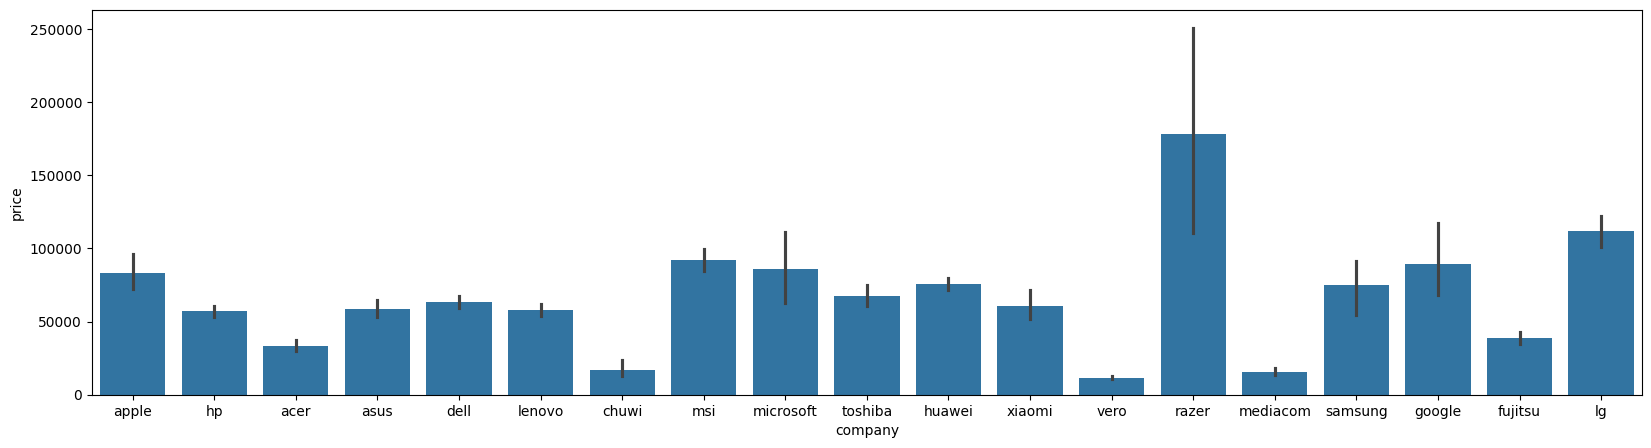

In [101]:
plt.figure(figsize=(20,5))
sns.barplot(x='company',y='price',data=data)
plt.show()

<Axes: xlabel='company'>

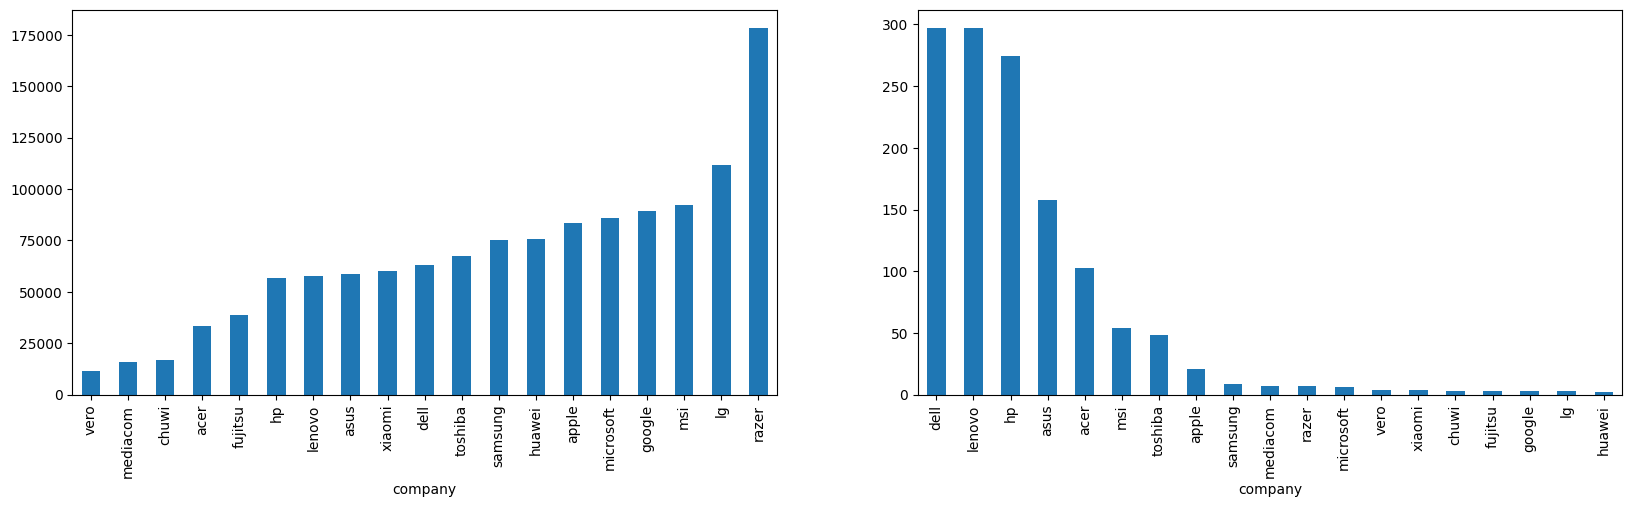

In [102]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
data.groupby('company')['price'].mean().sort_values().plot(kind='bar')
plt.subplot(1,2,2)
data['company'].value_counts().plot(kind='bar')

In [103]:
brands_to_change=data['company'].value_counts()[data['company'].value_counts()<5].index

In [104]:
data['company']=data['company'].apply(lambda x:'others' if x in brands_to_change else x)

<Axes: xlabel='company'>

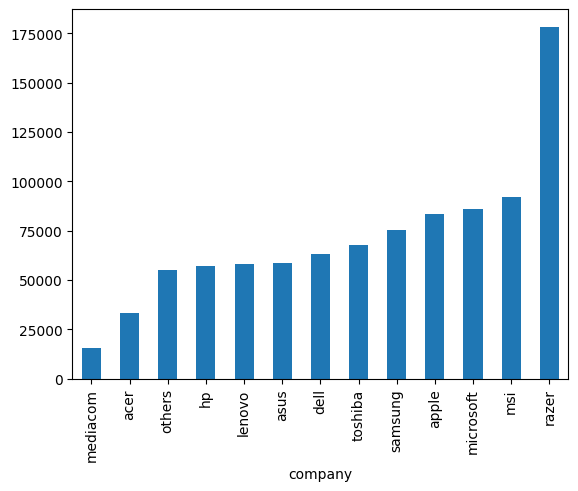

In [105]:
data.groupby('company')['price'].mean().sort_values().plot(kind='bar')

In [106]:
data['typename'].value_counts()

typename
notebook              727
gaming                205
ultrabook             196
2 in 1 convertible    121
workstation            29
netbook                25
Name: count, dtype: int64

In [107]:
data.head()

,company,typename,ram,full_hd,ips_panel,touchscreen,4k_display,cpu_type,cpu_speed,cpu_brand,primary_memory_type,primary_memory_capacity,secondary_memory_type,secondary_memory_capacity,gpu_brand,os,weight,price,ppi
0,apple,ultrabook,8,0,1,0,0,core i5,2.3,intel,ssd,128,no secondary memory,0,intel,mac,1.37,71378.68,226.98
1,apple,ultrabook,8,0,0,0,0,core i5,1.8,intel,flash storage,128,no secondary memory,0,intel hd,mac,1.34,47895.52,127.68
2,hp,notebook,8,1,0,0,0,core i5,2.5,intel,ssd,256,no secondary memory,0,intel hd,no os,1.86,30636.00,141.21
3,apple,ultrabook,16,0,1,0,0,core i7,2.7,intel,ssd,512,no secondary memory,0,amd radeon,mac,1.83,135195.34,220.53
4,apple,ultrabook,8,0,1,0,0,core i5,3.1,intel,ssd,256,no secondary memory,0,intel,mac,1.37,96095.81,226.98


In [108]:
cpu_type_to_remove=data['cpu_type'].value_counts()[data['cpu_type'].value_counts()<35].index

In [109]:
data['typename']=data['typename'].apply(lambda x:'others' if x in cpu_type_to_remove else x)

In [110]:
gpu_to_change=data['gpu_brand'].value_counts()[data['gpu_brand'].value_counts()<30].index

In [111]:
data['gpu_brand']=data['gpu_brand'].apply(lambda x: 'others' if x in gpu_to_change else x)

In [112]:
data['os'].value_counts()

os
windows      1127
no os          66
linux          62
chrome os      27
mac            21
Name: count, dtype: int64

In [113]:
data['ram'].value_counts()

ram
8     619
4     375
16    200
6      41
12     25
2      22
32     17
24      3
64      1
Name: count, dtype: int64

In [114]:
data[data['ram']==64]

,company,typename,ram,full_hd,ips_panel,touchscreen,4k_display,cpu_type,cpu_speed,cpu_brand,primary_memory_type,primary_memory_capacity,secondary_memory_type,secondary_memory_capacity,gpu_brand,os,weight,price,ppi
1066,asus,gaming,64,1,1,0,0,core i7,2.7,intel,ssd,1024,no secondary memory,0,nvidia geforce,windows,3.58,211788.0,127.34


In [115]:
data['price']=np.log(data['price'])

In [116]:
data.head()

,company,typename,ram,full_hd,ips_panel,touchscreen,4k_display,cpu_type,cpu_speed,cpu_brand,primary_memory_type,primary_memory_capacity,secondary_memory_type,secondary_memory_capacity,gpu_brand,os,weight,price,ppi
0,apple,ultrabook,8,0,1,0,0,core i5,2.3,intel,ssd,128,no secondary memory,0,others,mac,1.37,11.175755,226.98
1,apple,ultrabook,8,0,0,0,0,core i5,1.8,intel,flash storage,128,no secondary memory,0,intel hd,mac,1.34,10.776777,127.68
2,hp,notebook,8,1,0,0,0,core i5,2.5,intel,ssd,256,no secondary memory,0,intel hd,no os,1.86,10.329931,141.21
3,apple,ultrabook,16,0,1,0,0,core i7,2.7,intel,ssd,512,no secondary memory,0,amd radeon,mac,1.83,11.814476,220.53
4,apple,ultrabook,8,0,1,0,0,core i5,3.1,intel,ssd,256,no secondary memory,0,others,mac,1.37,11.473101,226.98


In [117]:
X_train,X_test,y_train,y_test=train_test_split(data.drop('price',axis=1),data['price'],test_size=0.2,random_state=50)

In [118]:
X_train

,company,typename,ram,full_hd,ips_panel,touchscreen,4k_display,cpu_type,cpu_speed,cpu_brand,primary_memory_type,primary_memory_capacity,secondary_memory_type,secondary_memory_capacity,gpu_brand,os,weight,ppi
1299,lenovo,2 in 1 convertible,16,0,1,1,0,core i7,2.5,intel,ssd,512,no secondary memory,0,intel hd,windows,1.30,276.05
127,asus,notebook,4,0,0,0,0,others,1.5,amd,ssd,64,no secondary memory,0,amd radeon,windows,1.65,111.94
1188,dell,ultrabook,8,0,0,1,0,core i5,2.4,intel,ssd,256,no secondary memory,0,intel hd,linux,1.23,276.05
624,hp,notebook,4,0,0,0,0,core i5,2.3,intel,hdd,500,no secondary memory,0,intel hd,windows,1.88,100.45
925,dell,notebook,4,0,0,0,0,core i5,2.3,intel,hdd,500,no secondary memory,0,intel hd,windows,1.95,100.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1300,lenovo,notebook,2,0,0,0,0,celeron,1.6,intel,flash storage,64,no secondary memory,0,intel hd,windows,1.50,111.94
229,hp,notebook,8,1,0,0,0,core i7,2.7,intel,hdd,1024,no secondary memory,0,others,windows,1.90,141.21
70,microsoft,ultrabook,4,0,0,1,0,core i5,2.5,intel,ssd,128,no secondary memory,0,intel hd,windows,1.25,200.84
132,acer,ultrabook,8,1,1,0,0,core i7,1.8,intel,ssd,256,no secondary memory,0,intel uhd,windows,1.60,157.35


In [119]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   company                    1303 non-null   object 
 1   typename                   1303 non-null   object 
 2   ram                        1303 non-null   int64  
 3   full_hd                    1303 non-null   int64  
 4   ips_panel                  1303 non-null   int64  
 5   touchscreen                1303 non-null   int64  
 6   4k_display                 1303 non-null   int64  
 7   cpu_type                   1303 non-null   object 
 8   cpu_speed                  1303 non-null   float64
 9   cpu_brand                  1303 non-null   object 
 10  primary_memory_type        1303 non-null   object 
 11  primary_memory_capacity    1303 non-null   int64  
 12  secondary_memory_type      1303 non-null   object 
 13  secondary_memory_capacity  1303 non-null   int64

In [120]:
ohe_encoding=ColumnTransformer(transformers=[
    ('ohe_encoder',OneHotEncoder(sparse_output=False,drop='first'),[0,1,7,9,10,12,14,15])
],remainder='passthrough')

In [121]:
scaling=ColumnTransformer(transformers=[
    ('std_scaler',StandardScaler(),[2,8,11,13,16,17])
],remainder='passthrough')

In [122]:
forest_model=RandomForestRegressor()

In [123]:
forest_pipe=Pipeline([
    ('ohe',ohe_encoding),
    ('scaling',scaling),
    ('forest_model',forest_model)
])

In [124]:
forest_pipe.fit(X_train,y_train)

Pipeline(steps=[('ohe',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe_encoder',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  [0, 1, 7, 9, 10, 12, 14,
                                                   15])])),
                ('scaling',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('std_scaler',
                                                  StandardScaler(),
                                                  [2, 8, 11, 13, 16, 17])])),
                ('forest_model', RandomForestRegressor())])

In [125]:
forest_prediction=forest_pipe.predict(X_test)

In [126]:
r2_score(forest_prediction,y_test)

0.8601566335979952

In [127]:
data['ram'].value_counts()

ram
8     619
4     375
16    200
6      41
12     25
2      22
32     17
24      3
64      1
Name: count, dtype: int64

In [128]:
import pickle

In [129]:
pickle.dump(data,open('data.pkl','wb'))

In [130]:
pickle.dump(forest_pipe,open('model.pkl','wb'))

In [131]:
np.exp(forest_pipe.predict([['apple','ultrabook',8,0,0,0,0,'core i5',1.8,'intel','flash storage',128,'no secondary memory',0,'intel hd','mac',1.34,47895.52]]))

C:\Users\Rano's PC\Machine\virtualenv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(


array([73473.53674953])